In [23]:
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
from shapely.geometry import Polygon 



In [4]:
path_kunming = 'data/Section-6/kunming_wgs84.gpkg'



In [17]:
kunming_gpd = gpd.read_file(path_kunming)
kunming_gpd


,dt_adcode,dt_name,geometry
0,530102,wuhua,"MULTIPOLYGON (((102.71331 25.13651, 102.71547 ..."
1,530103,panglong,"MULTIPOLYGON (((102.71668 25.04473, 102.71663 ..."
2,530111,guandu,"MULTIPOLYGON (((102.71717 25.03341, 102.71792 ..."
3,530112,xishan,"MULTIPOLYGON (((102.50726 24.86019, 102.50689 ..."
4,530113,dongchuan,"MULTIPOLYGON (((102.80340 26.30291, 102.80537 ..."
5,530114,chenggong,"MULTIPOLYGON (((102.85321 24.69792, 102.85168 ..."
6,530115,jinling,"MULTIPOLYGON (((102.73979 24.81731, 102.74137 ..."
7,530124,fumin,"MULTIPOLYGON (((102.63768 25.36767, 102.64085 ..."
8,530125,yiliang,"MULTIPOLYGON (((103.27379 25.25786, 103.27332 ..."
9,530126,shilin,"MULTIPOLYGON (((103.66655 24.72420, 103.66542 ..."


In [19]:
ids_chenggong = np.where(kunming_gpd['dt_name'] == 'chenggong')[0]
chenggong_gpd = kunming_gpd.iloc[ids_chenggong, :]
chenggong_gpd


,dt_adcode,dt_name,geometry
5,530114,chenggong,"MULTIPOLYGON (((102.85321 24.69792, 102.85168 ..."


Text(0.5, 1.0, 'chenggong')

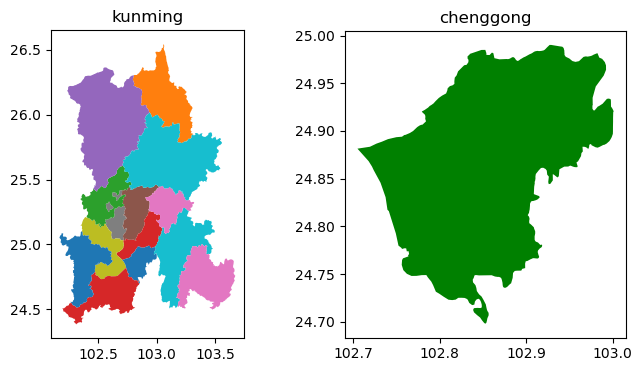

In [22]:
fig, ax = plt.subplots(1,2, figsize=(8,4))
kunming_gpd.plot(ax=ax[0], column='dt_name')
ax[0].set_title('kunming')
chenggong_gpd.plot(ax=ax[1], color='green')
ax[1].set_title('chenggong')


In [41]:
dict = { 'name': ['region1'], \
        'geometry': [Polygon([(102,25), (102.5,25.5),(103,25.5),(103,25)])]}
region_gpd = gpd.GeoDataFrame(dict, crs='EPSG:4326')
region_gpd


,name,geometry
0,region1,"POLYGON ((102.00000 25.00000, 102.50000 25.500..."


In [42]:
region_clip = kunming_gpd.clip(region_gpd)
region_clip


,dt_adcode,dt_name,geometry
13,530181,anling,"MULTIPOLYGON (((102.22942 25.00000, 102.22912 ..."
3,530112,xishan,"POLYGON ((102.61131 25.09966, 102.61244 25.097..."
2,530111,guandu,"POLYGON ((102.71717 25.03341, 102.71792 25.033..."
0,530102,wuhua,"MULTIPOLYGON (((102.71331 25.13651, 102.71547 ..."
1,530103,panglong,"POLYGON ((102.71668 25.04473, 102.71663 25.045..."
10,530127,songming,"MULTIPOLYGON (((102.95307 25.25274, 102.95301 ..."
7,530124,fumin,"POLYGON ((102.63768 25.36767, 102.64085 25.367..."
12,530129,xuandian,"POLYGON ((103.00000 25.45815, 102.99576 25.459..."
11,530128,luquan,"POLYGON ((102.45946 25.42993, 102.46137 25.433..."


<Axes: >

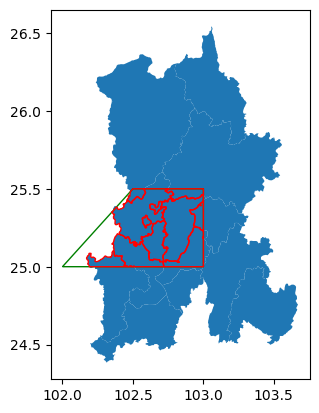

In [43]:
ax = kunming_gpd.plot()
region_gpd.plot(ax=ax, facecolor='none', edgecolor='green' )
region_clip.plot(ax=ax, facecolor='none', edgecolor='red')




<Axes: >

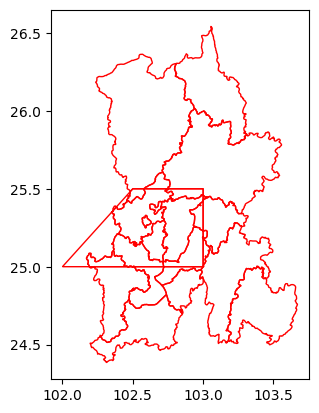

In [47]:
region_union = kunming_gpd.overlay(region_gpd, how='union')
# ax = kunming_gpd.plot()
# region_gpd.plot(ax=ax, facecolor='none', edgecolor='green' )
region_union.plot(facecolor='none', edgecolor='red')




In [48]:
path_kunming_out_1 = 'data/Section-6/1111.gpkg'
kunming_gpd_1 = kunming_gpd[['dt_name', 'geometry']]
kunming_gpd_1


,dt_name,geometry
0,wuhua,"MULTIPOLYGON (((102.71331 25.13651, 102.71547 ..."
1,panglong,"MULTIPOLYGON (((102.71668 25.04473, 102.71663 ..."
2,guandu,"MULTIPOLYGON (((102.71717 25.03341, 102.71792 ..."
3,xishan,"MULTIPOLYGON (((102.50726 24.86019, 102.50689 ..."
4,dongchuan,"MULTIPOLYGON (((102.80340 26.30291, 102.80537 ..."
5,chenggong,"MULTIPOLYGON (((102.85321 24.69792, 102.85168 ..."
6,jinling,"MULTIPOLYGON (((102.73979 24.81731, 102.74137 ..."
7,fumin,"MULTIPOLYGON (((102.63768 25.36767, 102.64085 ..."
8,yiliang,"MULTIPOLYGON (((103.27379 25.25786, 103.27332 ..."
9,shilin,"MULTIPOLYGON (((103.66655 24.72420, 103.66542 ..."


In [49]:
kunming_gpd_1.to_file(path_kunming_out_1)


In [50]:
path_kunming_out_2 = 'data/Section-6/2222.gpkg'
kunming_out_2 = kunming_gpd.iloc[ids_chenggong]
kunming_out_2


,dt_adcode,dt_name,geometry
5,530114,chenggong,"MULTIPOLYGON (((102.85321 24.69792, 102.85168 ..."


In [51]:
kunming_out_2.to_file(path_kunming_out_2)
